Importation des librairy qui vont bien pour les svm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from numpy.random import seed
from numpy.random import randn
import pandas as pd 
import seaborn as sns

Création de données linéairement séparables

In [2]:
# nombre d'individus d'apprentissage
nbi=50
# nombre d'individu de test
nbt=1000
# Moyennes des deux classes
m1=[1,1]
m2=[-1,-2]
#variance des variables des classes
S1=0.5
S2=1.5

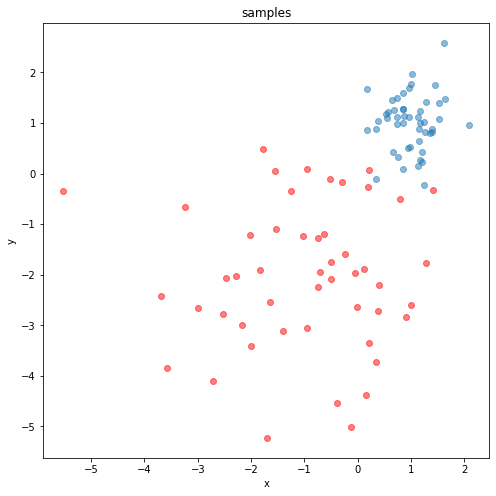

In [4]:
un1=np.ones([nbi,1])
x1=randn(nbi,2)*S1+un1*m1
x2=randn(nbi,2)*S2+un1*m2
#--------
xapp=np.concatenate((x1, x2), axis=0)
lab_app=np.ones(2*nbi)
lab_app[0:nbi]=-1
#--------

xapp=np.concatenate((x1, x2), axis=0)
xsize=xapp.shape
plt.figure(figsize=(8,8))
plt.scatter(xapp[0:nbi-1,0],xapp[0:nbi-1:,1],alpha=0.5)
plt.scatter(xapp[nbi:2*nbi-1,0],xapp[nbi:2*nbi-1:,1],c='r',alpha=0.5)
plt.xlabel('x')  
plt.ylabel('y')  
  
# displaying the title 
plt.title("samples") 
plt.show()


Création des données de test

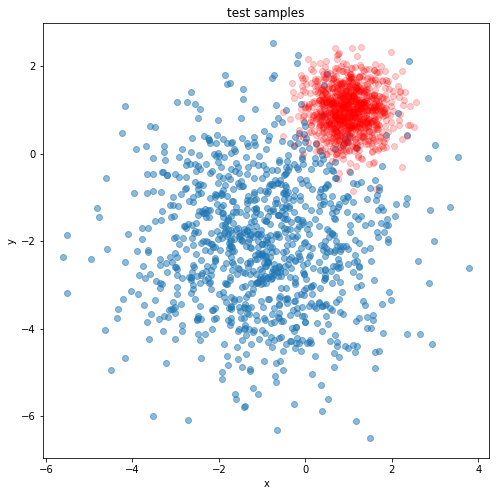

In [7]:
un2=np.ones([nbt,1])
x1=randn(nbt,2)*S1+un2*[1,1]
x2=randn(nbt,2)*S2-un2*[1,2]

xt=np.concatenate((x1, x2), axis=0)
unt=np.ones(2*nbt)
lab_test=unt
lab_test[0:nbt]=-1
labelt=lab_test>0

plt.figure(figsize=(8,8))
plt.scatter(xt[labelt,0],xt[labelt,1],alpha=0.5)
plt.scatter(xt[~labelt,0],xt[~labelt,1],c='r',alpha=0.2)
plt.xlabel('x')  
plt.ylabel('y')  
  
# displaying the title 
plt.title("test samples") 
plt.show()


Création des labels de l'ensemble d'apprentissage

In [8]:
label=lab_app>0

Affichage des deux classes

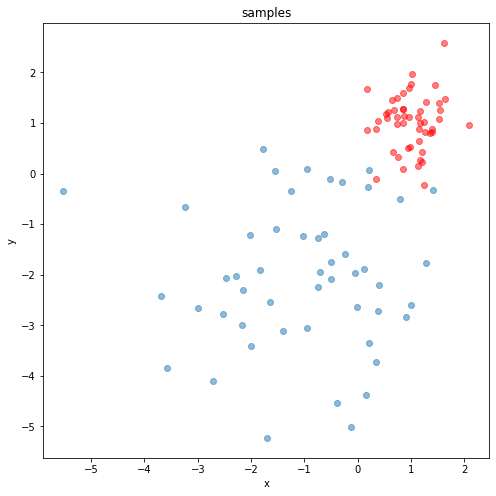

In [10]:
plt.figure(figsize=(8,8))
plt.scatter(xapp[label,0],xapp[label,1],alpha=0.5)
plt.scatter(xapp[~label,0],xapp[~label,1],c='r',alpha=0.5)
plt.xlabel('x')  
plt.ylabel('y')  
  
# displaying the title 
plt.title("samples") 
plt.show()

Apprentissage

In [11]:
#classifier = svm.SVC(kernel='linear',C=10000000)
classifier = svm.SVC(kernel='rbf',gamma=0.5, C=100)
classifier.fit(xapp, lab_app)
y_app_pred = classifier.decision_function(xapp)
lab_app_pred = np.sign(y_app_pred)
y_test_pred = classifier.decision_function(xt)
lab_test_pred = np.sign(y_test_pred)

eval_app=lab_app_pred-lab_app
eval_test=lab_test_pred-lab_test



Parcours d'une grille 2D pour affichage de la valeur de la fonction SVM

In [12]:
#print(np.min(Xmap))
#print(mn)
#print(Xmap.shape)

NameError: name 'Xmap' is not defined

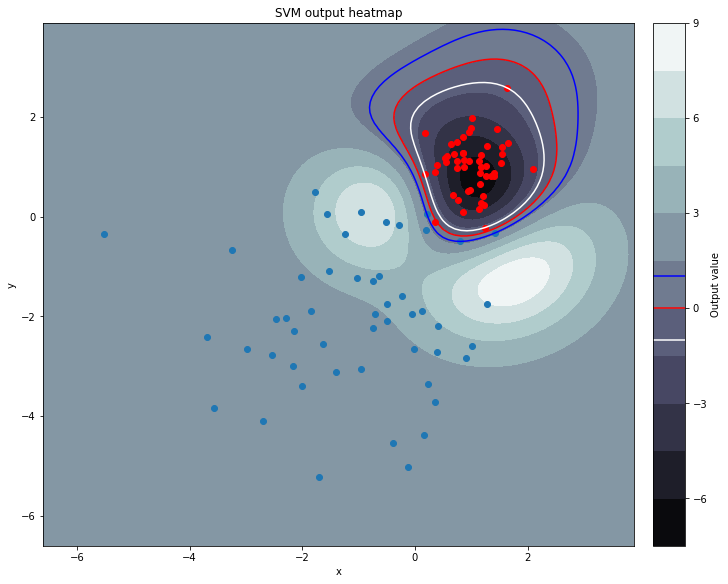

In [13]:
origin = 'lower'
nbs=100
mn=np.min(xt)-0.1
mx=np.max(xt)+0.1
delta=(mx-mn-1e-5)/(nbs-1)
x = y = np.arange(mn, mx, delta)
X, Y = np.meshgrid(x, y)
Xr=np.reshape(X,(nbs*nbs,1))
Yr=np.reshape(Y,(nbs*nbs,1))
Xmap=np.concatenate((Xr, Yr), axis=1)
Ymapr = classifier.decision_function(Xmap)
Ymap=np.reshape(Ymapr,(nbs,nbs))
Ymap.shape

fig1, ax1 = plt.subplots(constrained_layout=True,figsize=(10,8))
CS = ax1.contourf(X, Y, Ymap, 10, cmap=plt.cm.bone, origin=origin)
ax1.set_title('SVM output heatmap')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

#CS2 = ax1.contour(CS, levels=CS.levels[::1], colors='r', origin=origin)
CS2 = ax1.contour(CS, levels=(-1,0,1), colors=('w','r','b'), origin=origin)
# Make a colorbar for the ContourSet returned by the contourf call.
cbar = fig1.colorbar(CS)
cbar.ax.set_ylabel('Output value')
# Add the contour line levels to the colorbar
cbar.add_lines(CS2)

ax1.scatter(xapp[lab_app==1,0],xapp[lab_app==1,1])
ax1.scatter(xapp[lab_app==-1,0],xapp[lab_app==-1,1],c='r')

plt.show()

Evaluation des perfromances

In [14]:
[sum(abs(eval_app))/nbi/4,sum(abs(eval_test))/nbt/4]

[0.01, 0.0285]

0.9864959999999999


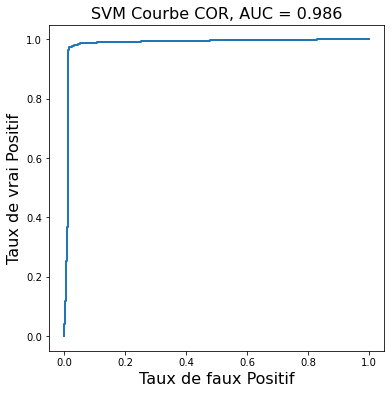

In [15]:
from sklearn import metrics
fpr, tpr, thr = metrics.roc_curve(lab_test, y_test_pred)

# calculer l'aire sous la courbe ROC
auc = metrics.auc(fpr, tpr)
print(auc)
# créer une figure
fig = plt.figure(figsize=(6, 6))

# afficher la courbe ROC
plt.plot(fpr, tpr, '-', lw=2, label='Lineaire, AUC=%.2f' % auc)

# donner un titre aux axes et au graphique
plt.xlabel('Taux de faux Positif', fontsize=16)
plt.ylabel('Taux de vrai Positif', fontsize=16)
plt.title('SVM Courbe COR, AUC = %.3f'%auc, fontsize=16)

# afficher l'image
plt.show()